<a href="https://colab.research.google.com/github/phrenico/control-notebooks/blob/main/Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulum 

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

!pip install slycot
!pip install control

The ODE description:
$$
\frac{\partial^2 \theta}{\partial t ^ 2} + s \frac{\partial \theta}{\partial t } + 
$$


State space equations:
$$
x_1 = \theta \\
x_2 = \dot{\theta}
$$

$$
\begin{align}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= - \frac{g}{L} sin(x_1) - s x_2 
\end{align}
$$

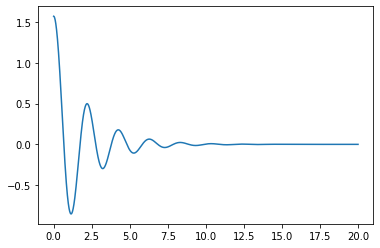

In [36]:
def f(x, t, s=1, L=1, g=9.81):
  dx1 = x[1]
  dx2 = - g / L *  np.sin(x[0]) - s * x[1]
  return [dx1, dx2]


s = 1
L= 1
g= 9.81

x0 = [np.pi/2, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)

plt.plot(t, phi[:, 0])

In [31]:
J_down = np.array([[0, 1], [-g / L, -s]])

J_up = np.array([[0, 1], [g / L, -s]])

np.linalg.eig(J_up)

(array([ 2.67175031, -3.67175031]), array([[ 0.35053751, -0.26277828],
        [ 0.93654869,  0.96485624]]))

In [32]:
np.linalg.eig(J_down)

(array([-0.5+3.09192497j, -0.5-3.09192497j]),
 array([[-0.04855374-0.30024902j, -0.04855374+0.30024902j],
        [ 0.9526243 +0.j        ,  0.9526243 -0.j        ]]))

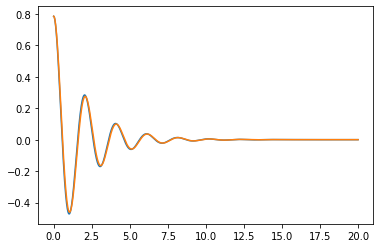

In [40]:
# linearized dynamics
def lin_f(x, t, A=J_down):
  return np.dot(A, x)

x0 = [np.pi/4, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)
phi_approx = odeint(lin_f, x0, t)

plt.plot(t, phi_approx[:, 0])
plt.plot(t, phi[:, 0])

In [44]:
np.linalg.matrix_rank(J_up)

2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 24.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1418336 sha256=902854e503a3ab9c7f6ab104fa4904ce9c737701ad43e34ca530f8f67df6ab11
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 28.9 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=a2d64750bac31a0bc5dc493005247f52d0f759aa3878c53ee6250cacba520553
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [51]:
import control.matlab as ctl

In [55]:
np.linalg.matrix_rank(ctl.ctrb(J_up, [[0],[1]]))

2